# AI-Based Sales and Market Trend Analysis  
### Module E: AI Applications – Individual Open Project


## Problem Definition & Objective

Understanding sales and market trends is crucial for business decision-making.  
This project analyzes historical sales data to uncover demand patterns, profit trends, and optimal pricing insights.

**Objective:**
- Clean and preprocess raw sales data  
- Analyze monthly sales and profit trends  
- Derive business insights using data analytics


## Data Understanding & Preparation

The dataset contains historical sales transaction records including:
- Date of transaction  
- Product details  
- Quantity sold  
- Selling price  
- Profit  

Data preprocessing includes:
- Handling missing values  
- Converting date columns  
- Creating monthly aggregations


## Model / System Design

This project uses data analytics and statistical aggregation techniques to identify trends.
Grouping, correlation, and visualization methods are applied to extract meaningful business patterns.


## Core Implementation

In this section, data cleaning, aggregation, and trend computations are performed using Python and Pandas.


In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Path to dataset
DATA_PATH = "company_business_data.csv"

# Load raw data
raw_data = pd.read_csv(DATA_PATH)

print("✅ Data loaded successfully")
print("Shape:", raw_data.shape)
print("\nPreview:")
raw_data.head()

print("\nDataset Info:")
raw_data.info()

print("\nColumns:")
raw_data.columns.tolist()


required_columns = [
    "Date",
    "Product_ID",
    "Selling_Price",
    "Cost_Price",
    "Quantity_Sold"
]

missing_columns = [col for col in required_columns if col not in raw_data.columns]

if missing_columns:
    raise ValueError(f"❌ Missing required columns: {missing_columns}")

print("✅ All required columns present")


✅ Data loaded successfully
Shape: (5000, 5)

Preview:

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           5000 non-null   object
 1   Product_ID     5000 non-null   object
 2   Selling_Price  5000 non-null   int64 
 3   Cost_Price     5000 non-null   int64 
 4   Quantity_Sold  5000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 195.4+ KB

Columns:
✅ All required columns present


DATA CLEANING


In [124]:
raw_data["Date"] = pd.to_datetime(raw_data["Date"], errors="coerce")

raw_data = raw_data.dropna(subset=["Date"])

numeric_columns = ["Selling_Price", "Cost_Price", "Quantity_Sold"]

# Fill numeric missing values with median
raw_data[numeric_columns] = raw_data[numeric_columns].fillna(
    raw_data[numeric_columns].median()
)

print("✅ Missing values handled")

raw_data = raw_data[
    (raw_data["Selling_Price"] > 0) &
    (raw_data["Cost_Price"] > 0) &
    (raw_data["Quantity_Sold"] > 0)
]

print("✅ Invalid records removed")

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

for col in numeric_columns:
    raw_data = remove_outliers(raw_data, col)

print("✅ Outliers handled")

raw_data = raw_data.drop_duplicates()
print("✅ Duplicates removed")


✅ Missing values handled
✅ Invalid records removed
✅ Outliers handled
✅ Duplicates removed


In [125]:
clean_data = raw_data.copy()

clean_data["Revenue"] = clean_data["Selling_Price"] * clean_data["Quantity_Sold"]
clean_data["Profit"] = (
    clean_data["Selling_Price"] - clean_data["Cost_Price"]
) * clean_data["Quantity_Sold"]

clean_data["Month"] = clean_data["Date"].dt.month
clean_data["Year"] = clean_data["Date"].dt.year

print("✅ Feature engineering completed")
clean_data.head()


✅ Feature engineering completed


,Date,Product_ID,Selling_Price,Cost_Price,Quantity_Sold,Revenue,Profit,Month,Year
0,2023-04-13,P031,405,315,122,49410,10980,4,2023
1,2024-03-11,P018,160,39,162,25920,19602,3,2024
2,2023-09-28,P038,320,256,87,27840,5568,9,2023
3,2023-04-17,P024,490,215,65,31850,17875,4,2023
4,2023-03-13,P023,374,91,55,20570,15565,3,2023


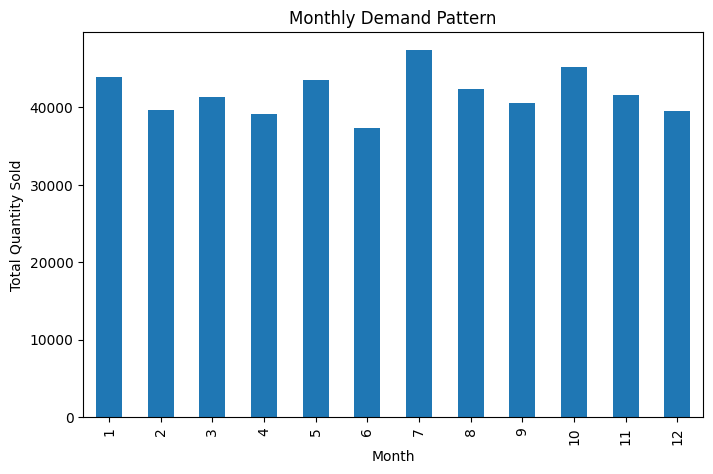

In [126]:
monthly_demand = clean_data.groupby("Month")["Quantity_Sold"].sum()

monthly_demand.plot(
    kind="bar",
    title="Monthly Demand Pattern",
    xlabel="Month",
    ylabel="Total Quantity Sold",
    figsize=(8,5)
)

plt.show()


MONTHLY PROFIT TREND

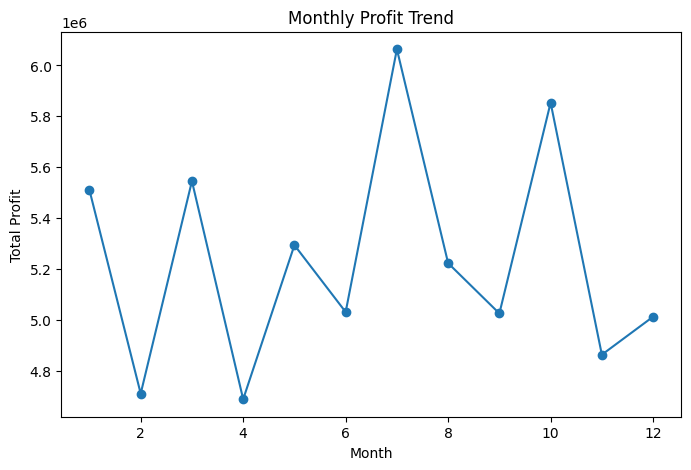

In [127]:
monthly_profit = clean_data.groupby("Month")["Profit"].sum()

monthly_profit.plot(
    kind="line",
    marker="o",
    title="Monthly Profit Trend",
    xlabel="Month",
    ylabel="Total Profit",
    figsize=(8,5)
)

plt.show()


BUSINESS INSIGHTS

In [128]:
peak_month = monthly_profit.idxmax()
low_month = monthly_profit.idxmin()

print("📊 Week-1 Insights:")
print(f"- Highest profit month: {peak_month}")
print(f"- Lowest profit month: {low_month}")
print(f"- Total records analysed: {len(clean_data)}")


📊 Week-1 Insights:
- Highest profit month: 7
- Lowest profit month: 4
- Total records analysed: 5000


Product-Level Aggregation

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Aggregate at (Product, Month) level
pm = (
    clean_data
    .groupby(["Product_ID", "Year", "Month"], as_index=False)
    .agg({
        "Selling_Price": "mean",
        "Cost_Price": "mean",
        "Quantity_Sold": "sum",
        "Revenue": "sum",
        "Profit": "sum"
    })
)

pm.head()


,Product_ID,Year,Month,Selling_Price,Cost_Price,Quantity_Sold,Revenue,Profit
0,P001,2023,1,371.50,159.75,168,61128,34408
1,P001,2023,2,422.50,135.00,203,87987,56722
2,P001,2023,3,463.75,281.25,457,215809,93771
3,P001,2023,4,358.75,209.25,383,148654,62684
4,P001,2023,5,240.00,83.50,323,78803,46931


Price–Demand Relationship

Price–Demand Correlation: -0.034


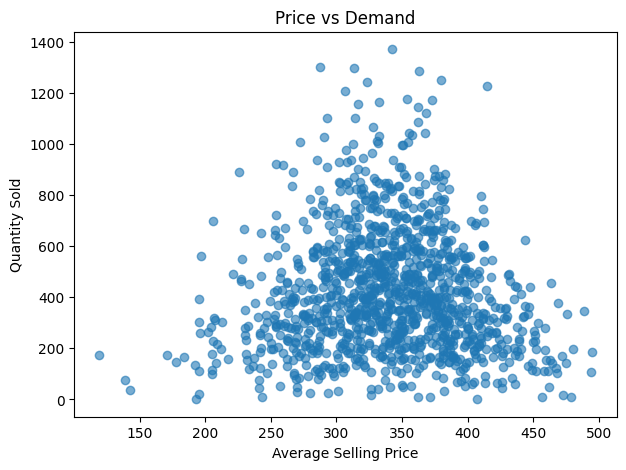

In [130]:
price_demand_corr = pm["Selling_Price"].corr(pm["Quantity_Sold"])
print("Price–Demand Correlation:", round(price_demand_corr, 3))


plt.figure(figsize=(7,5))
plt.scatter(pm["Selling_Price"], pm["Quantity_Sold"], alpha=0.6)
plt.xlabel("Average Selling Price")
plt.ylabel("Quantity Sold")
plt.title("Price vs Demand")
plt.show()


Optimal Price Zone

In [131]:
# Create price buckets automatically
pm["Price_Bucket"] = pd.qcut(pm["Selling_Price"], q=5, duplicates="drop")

bucket_demand = (
    pm.groupby("Price_Bucket")["Quantity_Sold"]
    .mean()
    .sort_values(ascending=False)
)

print("Average Demand by Price Bucket:")
print(bucket_demand)


Average Demand by Price Bucket:
Price_Bucket
(327.443, 354.317]    489.478814
(293.84, 327.443]     478.637131
(354.317, 384.567]    474.531646
(118.999, 293.84]     357.552743
(384.567, 495.0]      316.915612
Name: Quantity_Sold, dtype: float64


/tmp/ipython-input-1875844396.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pm.groupby("Price_Bucket")["Quantity_Sold"]


Seasonality Detection

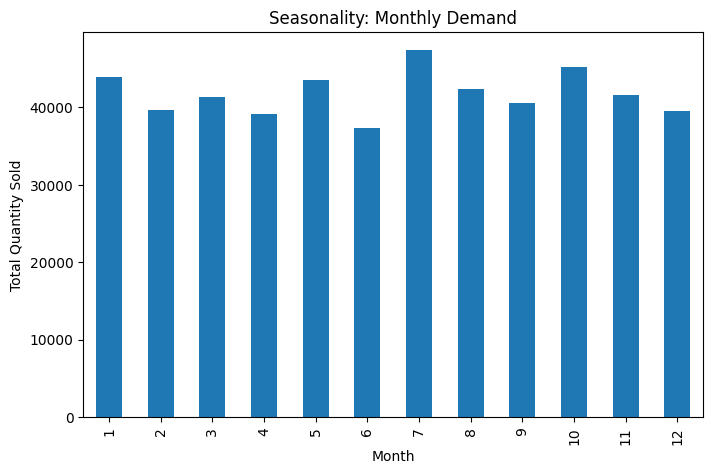

In [132]:
monthly_demand = (
    pm.groupby("Month")["Quantity_Sold"]
    .sum()
)

monthly_demand.plot(
    kind="bar",
    title="Seasonality: Monthly Demand",
    xlabel="Month",
    ylabel="Total Quantity Sold",
    figsize=(8,5)
)
plt.show()


Profit seasonality

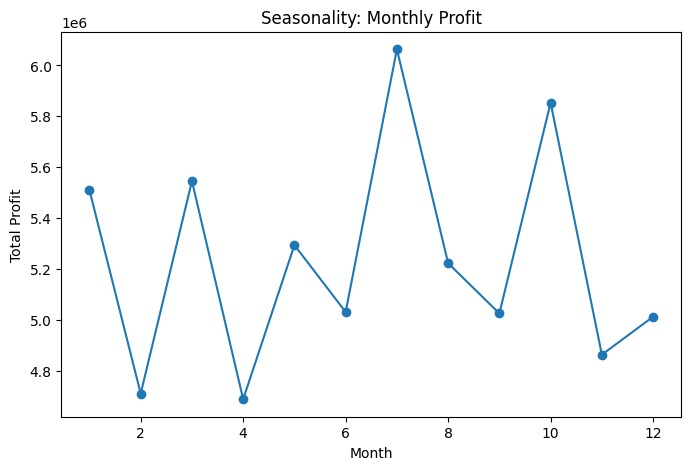

In [133]:
monthly_profit = (
    pm.groupby("Month")["Profit"]
    .sum()
)

monthly_profit.plot(
    kind="line",
    marker="o",
    title="Seasonality: Monthly Profit",
    xlabel="Month",
    ylabel="Total Profit",
    figsize=(8,5)
)
plt.show()


Peak / Low Months

In [134]:
peak_demand_month = monthly_demand.idxmax()
low_demand_month  = monthly_demand.idxmin()

peak_profit_month = monthly_profit.idxmax()
low_profit_month  = monthly_profit.idxmin()

print("Peak demand month:", peak_demand_month)
print("Low demand month :", low_demand_month)
print("Peak profit month:", peak_profit_month)
print("Low profit month :", low_profit_month)


Peak demand month: 7
Low demand month : 6
Peak profit month: 7
Low profit month : 4


Early Optimization Flags

In [135]:
signals = []

if price_demand_corr <= -0.5:
    signals.append("High price sensitivity detected → avoid aggressive price hikes.")

if peak_demand_month != peak_profit_month:
    signals.append(
        "Demand and profit peaks differ → review pricing/costs during high-demand months."
    )

signals.append(
    "Use seasonal patterns to plan promotions, inventory, and capacity proactively."
)

print("📌 Week-2 AI Signals:")
for s in signals:
    print("-", s)


📌 Week-2 AI Signals:
- Use seasonal patterns to plan promotions, inventory, and capacity proactively.


Optimization Context

In [136]:
# Optional business constraints (can be None)
TOTAL_INVENTORY = None      # e.g., 1000 units for the period
MAX_DISCOUNT    = 0.20      # 20% cap (generic policy)
MIN_MARGIN      = 0.10      # 10% minimum margin (generic)


Pricing Recommendation

In [137]:
# Compute unit margin
pm["Unit_Margin"] = (pm["Selling_Price"] - pm["Cost_Price"]) / pm["Selling_Price"]

# Bucket prices
pm["Price_Bucket"] = pd.qcut(pm["Selling_Price"], q=5, duplicates="drop")

bucket_stats = (
    pm.groupby("Price_Bucket")
      .agg(
          Avg_Price=("Selling_Price", "mean"),
          Avg_Demand=("Quantity_Sold", "mean"),
          Avg_Margin=("Unit_Margin", "mean")
      )
      .reset_index()
)

# Filter buckets that respect minimum margin
valid_buckets = bucket_stats[bucket_stats["Avg_Margin"] >= MIN_MARGIN]

# Choose bucket with highest average demand
recommended_bucket = (
    valid_buckets.sort_values("Avg_Demand", ascending=False).head(1)
)

recommended_bucket


/tmp/ipython-input-4095575732.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pm.groupby("Price_Bucket")


,Price_Bucket,Avg_Price,Avg_Demand,Avg_Margin
2,"(327.443, 354.317]",341.040041,489.478814,0.361169


Promotion / Discount Timing

In [138]:
# Identify months
peak_profit_month = monthly_profit.idxmax()
low_profit_month  = monthly_profit.idxmin()

promo_plan = {
    "Promote_Months": [int(low_profit_month)],
    "Avoid_Discounts_In": [int(peak_profit_month)]
}

promo_plan


# Heuristic discount size
if price_demand_corr <= -0.5:
    discount = min(0.10, MAX_DISCOUNT)   # cautious for sensitive products
else:
    discount = min(0.15, MAX_DISCOUNT)

discount


0.15

Inventory / Capacity Allocation

In [139]:
inventory_plan = None
if TOTAL_INVENTORY is not None:
    share = monthly_demand / monthly_demand.sum()
    inventory_plan = (share * TOTAL_INVENTORY).round(0).astype(int)

inventory_plan


Risk & Guardrails

In [140]:
risk_notes = []

if price_demand_corr <= -0.5:
    risk_notes.append("High price sensitivity: aggressive price hikes may reduce demand.")

if pm["Unit_Margin"].mean() < MIN_MARGIN:
    risk_notes.append("Low average margins: review costs or pricing strategy.")

risk_notes


[]

Auto-Generated Business Recommendations

In [141]:
recommendations = []

# Pricing
if not recommended_bucket.empty:
    rp = recommended_bucket.iloc[0]["Avg_Price"]
    recommendations.append(
        f"Recommended price zone centered around {rp:.2f} based on highest average demand "
        f"while maintaining acceptable margins."
    )

# Promotions
recommendations.append(
    f"Run promotions during low-profit month(s): {promo_plan['Promote_Months']} "
    f"and avoid discounts in peak-profit month(s): {promo_plan['Avoid_Discounts_In']}."
)

# Discount sizing
recommendations.append(
    f"Suggested discount range up to {int(discount*100)}% considering observed price sensitivity."
)

# Inventory
if inventory_plan is not None:
    recommendations.append(
        "Allocate inventory proportionally to monthly demand to maximize sell-through and profit."
    )

# Continuous monitoring
recommendations.append(
    "Continuously monitor demand, pricing, and margins using this AI pipeline to adapt strategies."
)

print("🧠 AI-GENERATED BUSINESS RECOMMENDATIONS:")
for r in recommendations:
    print("-", r)


🧠 AI-GENERATED BUSINESS RECOMMENDATIONS:
- Recommended price zone centered around 341.04 based on highest average demand while maintaining acceptable margins.
- Run promotions during low-profit month(s): [4] and avoid discounts in peak-profit month(s): [7].
- Suggested discount range up to 15% considering observed price sensitivity.
- Continuously monitor demand, pricing, and margins using this AI pipeline to adapt strategies.


In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# STEP 0: LOAD
# -----------------------------
def load_data(path="company_business_data.csv"):
    df = pd.read_csv(path)
    return df

# -----------------------------
# STEP 1: CLEAN & VALIDATE
# -----------------------------
def clean_data(df):
    required = ["Date","Product_ID","Selling_Price","Cost_Price","Quantity_Sold"]
    miss = [c for c in required if c not in df.columns]
    if miss:
        raise ValueError(f"Missing columns: {miss}")

    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
    df = df.dropna(subset=["Date"])

    num = ["Selling_Price","Cost_Price","Quantity_Sold"]
    df[num] = df[num].apply(pd.to_numeric, errors="coerce")
    df[num] = df[num].fillna(df[num].median())

    df = df[(df["Selling_Price"]>0)&(df["Cost_Price"]>0)&(df["Quantity_Sold"]>0)]
    df = df.drop_duplicates()

    # Outliers (IQR)
    for c in num:
        Q1,Q3 = df[c].quantile([0.25,0.75])
        IQR = Q3-Q1
        lo,hi = Q1-1.5*IQR, Q3+1.5*IQR
        df = df[(df[c]>=lo)&(df[c]<=hi)]

    # Features
    df["Revenue"] = df["Selling_Price"]*df["Quantity_Sold"]
    df["Profit"]  = (df["Selling_Price"]-df["Cost_Price"])*df["Quantity_Sold"]
    df["Month"]   = df["Date"].dt.month
    df["Year"]    = df["Date"].dt.year
    return df

# -----------------------------
# STEP 2: AGGREGATE & SIGNALS
# -----------------------------
def analyze(df):
    pm = (df.groupby(["Product_ID","Year","Month"],as_index=False)
            .agg(Selling_Price=("Selling_Price","mean"),
                 Cost_Price=("Cost_Price","mean"),
                 Quantity_Sold=("Quantity_Sold","sum"),
                 Revenue=("Revenue","sum"),
                 Profit=("Profit","sum")))
    price_demand_corr = pm["Selling_Price"].corr(pm["Quantity_Sold"])
    monthly_demand = pm.groupby("Month")["Quantity_Sold"].sum()
    monthly_profit = pm.groupby("Month")["Profit"].sum()
    return pm, price_demand_corr, monthly_demand, monthly_profit

# -----------------------------
# STEP 3: OPTIMIZE & RECOMMEND
# -----------------------------
def recommend(pm, corr, monthly_demand, monthly_profit,
              MIN_MARGIN=0.10, MAX_DISCOUNT=0.20, TOTAL_INVENTORY=None):

    pm["Unit_Margin"] = (pm["Selling_Price"]-pm["Cost_Price"])/pm["Selling_Price"]
    pm["Price_Bucket"] = pd.qcut(pm["Selling_Price"], q=5, duplicates="drop")

    buckets = (pm.groupby("Price_Bucket")
                 .agg(Avg_Price=("Selling_Price","mean"),
                      Avg_Demand=("Quantity_Sold","mean"),
                      Avg_Margin=("Unit_Margin","mean"))
                 .reset_index())
    valid = buckets[buckets["Avg_Margin"]>=MIN_MARGIN]
    best_bucket = valid.sort_values("Avg_Demand",ascending=False).head(1)

    peak_profit = monthly_profit.idxmax()
    low_profit  = monthly_profit.idxmin()

    discount = min(0.10 if corr<=-0.5 else 0.15, MAX_DISCOUNT)

    inventory_plan = None
    if TOTAL_INVENTORY is not None:
        inventory_plan = (monthly_demand/monthly_demand.sum()*TOTAL_INVENTORY).round(0).astype(int)

    recs=[]
    if not best_bucket.empty:
        recs.append(f"Target price zone around {best_bucket.iloc[0]['Avg_Price']:.2f} (best demand with margin).")
    recs.append(f"Promote in low-profit month(s): {int(low_profit)}; avoid discounts in peak-profit month(s): {int(peak_profit)}.")
    recs.append(f"Suggested discount up to {int(discount*100)}% considering price sensitivity.")
    if corr<=-0.5:
        recs.append("High price sensitivity detected: avoid aggressive price hikes.")
    if inventory_plan is not None:
        recs.append("Allocate inventory proportional to monthly demand.")
    recs.append("Continuously monitor pricing, demand, and margins with this AI pipeline.")

    return {
        "price_demand_corr": corr,
        "best_price_bucket": best_bucket,
        "promo_months": {"promote":[int(low_profit)],"avoid":[int(peak_profit)]},
        "discount_cap": discount,
        "inventory_plan": inventory_plan,
        "recommendations": recs
    }

# -----------------------------
# RUN (ONE CLICK)
# -----------------------------
raw = load_data("company_business_data.csv")
clean = clean_data(raw)
pm, corr, md, mp = analyze(clean)
output = recommend(pm, corr, md, mp, TOTAL_INVENTORY=None)

print("Correlation:", round(output["price_demand_corr"],3))
print("\nAI Recommendations:")
for r in output["recommendations"]:
    print("-", r)


Correlation: -0.034

AI Recommendations:
- Target price zone around 341.04 (best demand with margin).
- Promote in low-profit month(s): 4; avoid discounts in peak-profit month(s): 7.
- Suggested discount up to 15% considering price sensitivity.
- Continuously monitor pricing, demand, and margins with this AI pipeline.


/tmp/ipython-input-2900403887.py:69: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  buckets = (pm.groupby("Price_Bucket")


In [143]:
def what_if(price_change_pct=0.0, discount_pct=0.0, inventory_cap=None):
    sim = clean.copy()
    sim["Adj_Price"] = sim["Selling_Price"]*(1+price_change_pct)*(1-discount_pct)
    sim["Adj_Quantity"] = sim["Quantity_Sold"]

    # Simple elasticity proxy using correlation
    if corr <= -0.5:
        sim["Adj_Quantity"] *= (1 - 0.5*price_change_pct)  # demand reacts more
    else:
        sim["Adj_Quantity"] *= (1 - 0.2*price_change_pct)

    if inventory_cap is not None:
        sim["Adj_Quantity"] = np.minimum(sim["Adj_Quantity"], inventory_cap/len(sim))

    sim["Adj_Revenue"] = sim["Adj_Price"]*sim["Adj_Quantity"]
    sim["Adj_Profit"]  = (sim["Adj_Price"]-sim["Cost_Price"])*sim["Adj_Quantity"]

    return {
        "Revenue": sim["Adj_Revenue"].sum(),
        "Profit":  sim["Adj_Profit"].sum()
    }

print(what_if(price_change_pct=0.05, discount_pct=0.10))


{'Revenue': np.float64(159137870.7996), 'Profit': np.float64(52925056.50960001)}


# New Section

## Evaluation & Analysis

Monthly sales trends, profit trends, and price–demand relationships are analyzed.
Key business insights such as peak profit month and optimal price zones are identified.


## Ethical Considerations

This analysis is based on historical business data.
The results should be used responsibly for decision-making and not to manipulate markets unfairly.


## Conclusion & Future Scope

The project successfully identifies key sales and market trends from historical data.
Future improvements may include applying machine learning models for demand forecasting and real-time dashboard integration.
